In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pyqg
import sys; sys.path.append('../src')
import coarsening_ops as coarsening

%matplotlib inline
plt.rcParams.update({'font.size': 13})

# Initialize a high-resolution model, run it for a little while

In [3]:
m1 = pyqg.QGModel(nx=256, dt=3600., log_level=0)
for _ in range(25000):
    m1._step_forward()

# Initialize our filtering and coarse-graining operators

In [79]:
op1 = coarsening.Operator1(m1, 64)
op2 = coarsening.Operator2(m1, 64)
op3 = coarsening.Operator3(m1, 64)
ops = [op1,op2,op3]

INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized


# Visualize effects on $q_1$

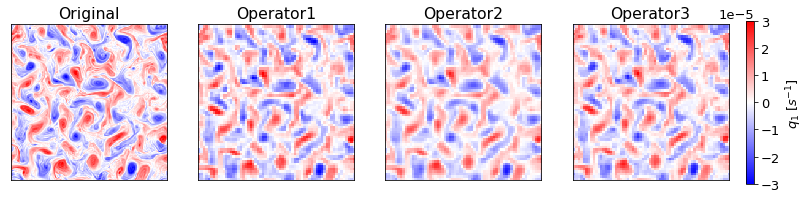

In [92]:
def imshow(arr, vlim=3e-5):
    plt.xticks([]); plt.yticks([])
    return plt.imshow(arr, vmin=-vlim, vmax=vlim, cmap='bwr', interpolation='none')

fig = plt.figure(figsize=(15.5,3))
plt.subplot(1,4,1, title='Original')
imshow(m1.q[0])
for j, op in enumerate(ops):
    plt.subplot(1,4,j+2, title=op.__class__.__name__)
    im = imshow(op.m2.q[0])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$q_1$ [$s^{-1}$]')

# Visualize effects on $S_{q_1}$

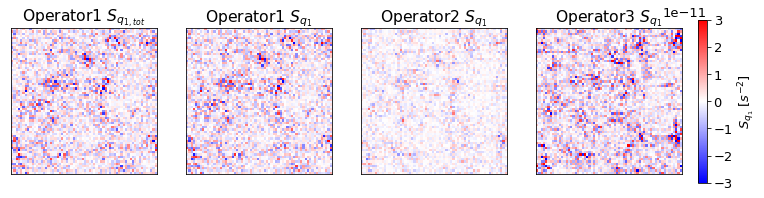

In [94]:
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,4,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[0], 3e-11)
for j, op in enumerate(ops):
    plt.subplot(1,4,j+2, title=op.__class__.__name__ + " $S_{q_1}$")
    im = imshow(op.subgrid_forcing('q')[0], 3e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')

# Visualize effects on $S_{u_1}$

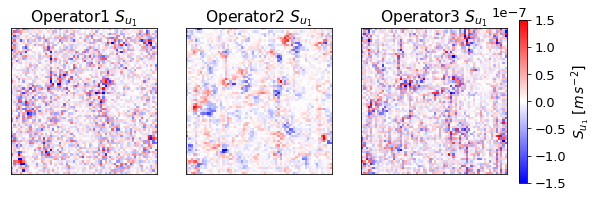

In [111]:
fig = plt.figure(figsize=(14.5,3))
for j, op in enumerate(ops):
    plt.subplot(1,4,j+2, title=op.__class__.__name__ + " $S_{u_1}$")
    im = imshow(op.subgrid_forcing('u')[0], 1.5e-7)
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{u_1}$ [$m\,s^{-2}$]', fontsize=14)

# Visualize effects on $\phi_{q_2}$

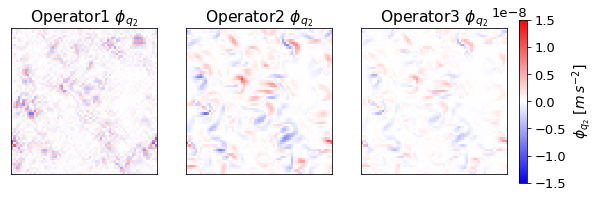

In [102]:
fig = plt.figure(figsize=(14.5,3))
for j, op in enumerate(ops):
    plt.subplot(1,4,j+1, title=op.__class__.__name__ + " $\phi_{q_2}$")
    uq, vq = op.subgrid_fluxes('q')
    im = imshow(uq[1], 1.5e-8)
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$\phi_{q_2}$ [$m\,s^{-2}$]', fontsize=14)